In [1]:
import numpy as np
import os
import sys
from plotnine import *
import pandas as pd

sys.path.append("/home/peter/personal/CoFI/")
import cofi_core
from cofi_core.inverse import DumbDescent 
from cofi_core.model import Model

In [2]:
OBJDIR="/home/peter/personal/CoFI/user_testing/rfc"
sys.path.append(OBJDIR)
import rfc 

In [4]:
rfc.cofi_init()

In [5]:
print(rfc.cofi_misfit.__doc__)

misfit,value_pred,value_obs = cofi_misfit(model)

Wrapper for ``cofi_misfit``.

Parameters
----------
model : input rank-2 array('f') with bounds (7,3)

Returns
-------
misfit : float
value_pred : rank-1 array('f') with bounds (626)
value_obs : rank-1 array('f') with bounds (626)



In [6]:
true_model = np.array([[8.370596, 3.249075, 1.7],
[17.23163, 3.001270, 1.7],
[1.9126695E-02, 2.509443, 1.7],
[19.78145, 3.562691, 1.7],
[41.73066, 4.225965, 1.7],
[14.35261, 2.963322, 1.7],
[49.92358, 4.586726, 1.7]])
noisy_model =  true_model + np.random.random(true_model.shape)*0.5
misfit, pred, obs = rfc.cofi_misfit(noisy_model)

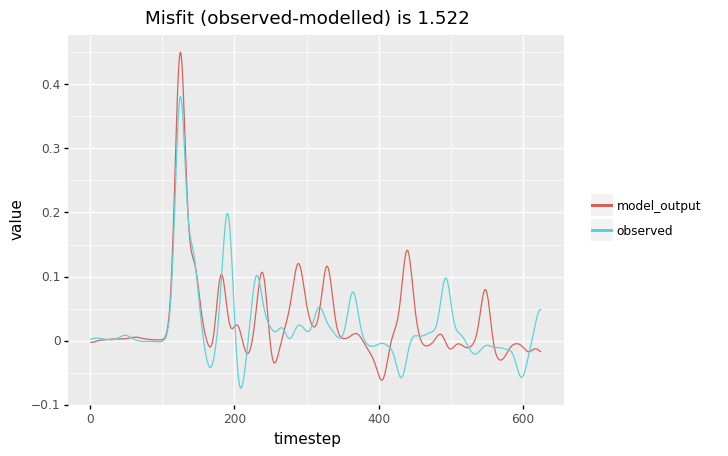

<ggplot: (8734330696695)>

In [7]:
df = pd.DataFrame(dict(timestep=range(len(pred)),model_output=pred, observed=obs))
p = ggplot(df.melt(id_vars="timestep"), aes(x="timestep",y="value",colour="variable")) + geom_line()
p = p + theme(legend_title=element_blank()) + ggtitle(f"Misfit (observed-modelled) is {misfit:0.3f}")
p

In [8]:
m=Model(earth_model=noisy_model)
desc = DumbDescent(start=m, step=0.2, userobj=rfc.cofi_misfit)
res = desc.run(30)

1.5224766731262207
1.81662917137146
1.6427339315414429
2.484438419342041
2.5280685424804688
2.1558780670166016
2.1973445415496826
3.009813070297241
1.7627140283584595
2.0315587520599365
1.6332896947860718
2.3205816745758057
1.9325016736984253
2.0763936042785645
1.9595996141433716
2.014467477798462
1.920048475265503
2.004521131515503
2.1626052856445312
1.8124440908432007
2.3615245819091797
1.8223408460617065
1.7392396926879883
2.587702989578247
2.230363368988037
2.4174108505249023
1.915498971939087
1.7317804098129272
2.5614964962005615
1.6103720664978027
2.1467483043670654
2.042729139328003
1.7721242904663086
1.7797788381576538
1.7229558229446411
2.494729518890381
2.1953608989715576
2.4268767833709717
2.065001964569092
2.028817653656006
2.07212233543396
2.453704357147217
2.1175858974456787
1.6697510480880737
1.6750798225402832
2.2389369010925293
2.7986533641815186
2.612354040145874
1.7854899168014526
2.7814157009124756
1.9845908880233765
2.260845422744751
2.328551769256592
2.14249134063

1.8466764688491821
2.221825361251831
1.7153220176696777
2.181330680847168
2.0381972789764404
2.273467779159546
1.5629676580429077
2.6030187606811523
2.4632954597473145
2.0601694583892822
2.253615140914917
2.587010383605957
1.952115535736084
2.1956212520599365
1.8703774213790894
2.4037890434265137
2.562791109085083
2.553877830505371
1.6923933029174805
2.015786647796631
2.6514089107513428
1.789825677871704
2.16208553314209
1.9179418087005615
2.120643138885498
1.833990454673767
2.405155658721924
1.9169988632202148
2.2587170600891113
2.097414493560791
2.299417018890381
2.215278148651123
1.7297704219818115
1.990606665611267
2.169205665588379
1.87688148021698
1.9958823919296265
1.8751413822174072
2.3274433612823486
2.3401880264282227
2.041215181350708
1.612355351448059
2.370591878890991
2.012204885482788
1.7601556777954102
1.9956938028335571
1.39596426486969
2.0117878913879395
2.6327600479125977
2.3141961097717285
2.0352134704589844
1.972020149230957
2.7894773483276367
1.9678572416305542
2.4

1.7429183721542358
1.8465968370437622
1.8111159801483154
2.501249313354492
2.3365588188171387
2.575247287750244
2.2550618648529053
2.5170814990997314
1.8874326944351196
2.530804395675659
2.0341200828552246
2.385267734527588
2.403507709503174
2.1674373149871826
1.955359935760498
2.7618393898010254
2.0748019218444824
1.8445616960525513
1.7929582595825195
2.1651265621185303
1.7126091718673706
2.2937679290771484
1.910567045211792
2.0631003379821777
2.4269402027130127
2.0135364532470703
2.091301918029785
1.6027995347976685
2.148179292678833
1.9233734607696533
2.4140219688415527
2.032717227935791
1.7951080799102783
2.442514181137085
2.107680082321167
2.5055105686187744
1.4613099098205566
2.5483224391937256
2.166677474975586
2.1403965950012207
2.517686128616333
2.0789856910705566
2.3356049060821533
1.9926482439041138
2.4354066848754883
2.5675203800201416
2.1058669090270996
2.2205939292907715
1.820774793624878
2.068563222885132
2.8430187702178955
2.874929189682007
2.2279605865478516
2.31600975

2.7692747116088867
2.1468029022216797
2.186786651611328
2.1930158138275146
2.4170660972595215
1.971822738647461
2.2755696773529053
1.4480364322662354
2.0714640617370605
1.7192355394363403
2.0004384517669678
1.7602205276489258
2.3734281063079834
3.1491458415985107
1.9084864854812622
1.7442058324813843
2.120654582977295
2.1302225589752197
1.7423855066299438
1.7434226274490356
1.7573015689849854
2.06170392036438
2.043395519256592
2.175431728363037
2.519261360168457
2.4903790950775146
2.239790439605713
1.9959834814071655
1.8662227392196655
2.200590133666992
2.193437099456787
1.8682670593261719
1.9140970706939697
1.8298200368881226
1.899404764175415
2.046139717102051
2.0582165718078613
2.3814642429351807
2.4666993618011475
2.041416883468628
1.964768886566162
1.670405626296997
1.6124155521392822
1.7685257196426392
2.150620937347412
2.7736878395080566
1.842340350151062
2.126174211502075
1.8970344066619873
2.1885523796081543
2.199871063232422
1.8123446702957153
1.8642241954803467
2.27137184143

2.0003104209899902
2.114232063293457
1.7386616468429565
2.2846803665161133
2.6375765800476074
2.652742385864258
2.121307611465454
1.9539903402328491
2.3245933055877686
2.2887122631073
2.3162460327148438
2.503077268600464
2.2228641510009766
2.379650592803955
1.8575928211212158
2.6496009826660156
2.7747011184692383
1.8510196208953857
2.059875011444092
1.7960070371627808
2.1380152702331543
2.009500026702881
2.2184786796569824
2.381380796432495
2.51045823097229
2.0851869583129883
2.102663040161133
2.0954747200012207
2.1464171409606934
2.012500286102295
2.3358569145202637
2.0669443607330322
2.497614860534668
2.1029226779937744
1.867214322090149
2.029480457305908
1.6658098697662354
2.392885684967041
2.190478563308716
2.313659906387329
2.426159620285034
1.5954588651657104
2.0007152557373047
2.8817954063415527
2.309891939163208
2.524894952774048
1.8013064861297607
1.4934378862380981
2.1332998275756836
2.4063074588775635
2.1099061965942383
1.4876903295516968
1.9201197624206543
1.900120139122009

1.8140708208084106
2.1965317726135254
2.3464179039001465
1.9034754037857056
2.148169994354248
2.287726879119873
1.9183814525604248
1.920676827430725
1.525683045387268
2.329486608505249
1.8543721437454224
2.505427122116089
2.560953140258789
2.035289764404297
2.1672606468200684
2.293558120727539
2.4956209659576416
2.0881733894348145
2.0362708568573
2.089334726333618
2.0464882850646973
2.3552298545837402
2.3687188625335693
1.9740339517593384
2.481956720352173
1.899207592010498
2.137845277786255
2.1191327571868896
2.0319554805755615
2.453542709350586
1.8999309539794922
1.8148603439331055
1.4095669984817505
2.033658504486084
1.716100811958313
2.6839747428894043
1.7470028400421143
2.3141372203826904
2.496668815612793
2.2271227836608887
2.3577311038970947
2.0195181369781494
1.9277212619781494
1.7201168537139893
2.1862006187438965
2.367549180984497
1.9951088428497314
1.9372704029083252
1.9912158250808716
2.133774518966675
1.7673871517181396
1.7916374206542969
2.2562737464904785
2.0648086071014

2.268596887588501
2.029707431793213
2.1720778942108154
1.900692105293274
1.85287344455719
2.2103395462036133
1.8795799016952515
2.0633139610290527
2.3075664043426514
2.3023688793182373
2.0574147701263428
2.0276992321014404
1.623787522315979
2.474473476409912
2.1237125396728516
2.571669578552246
2.2118887901306152
2.0578932762145996
2.3646202087402344
2.050647258758545
1.8923792839050293
1.9960225820541382
2.1418075561523438
1.7352699041366577
1.844315528869629
2.0952627658843994
2.2510650157928467
2.4558372497558594
2.144334077835083
2.1825857162475586
2.2467665672302246
1.9133906364440918
2.369910478591919
2.12747859954834
1.9490323066711426
1.738345980644226
2.089982032775879
1.9858925342559814
2.4763271808624268
1.7984317541122437
2.422097682952881
2.576214551925659
2.3140318393707275
2.1354358196258545
1.9678701162338257
2.4467458724975586
2.122551918029785
1.9394605159759521
2.164233684539795
1.6228710412979126
1.5912026166915894
2.272679328918457
2.316169500350952
2.4861185550689

2.2970731258392334
2.4132418632507324
1.9879332780838013
2.074458599090576
2.2755515575408936
2.3989453315734863
2.0318655967712402
1.7682653665542603
1.8755449056625366
2.5778799057006836
2.078913927078247
1.9986252784729004
2.715053081512451
2.2279250621795654
2.307365894317627
2.136831521987915
1.7371952533721924
2.106504440307617
2.240962505340576
2.4254491329193115
2.247145414352417
1.6726919412612915
2.2576904296875
1.9315364360809326
2.536827325820923
2.522498607635498
2.025259494781494
2.3985424041748047
2.160670042037964
2.1890299320220947
1.9789400100708008
1.98050057888031
2.392461061477661
2.1461663246154785
1.5308094024658203
2.218998432159424
2.7937211990356445
2.5591208934783936
2.3879806995391846
2.2207260131835938
1.5175353288650513
2.4856395721435547
1.8547813892364502
2.1079187393188477
2.032832622528076
2.6585161685943604
2.521394968032837
2.7349371910095215
2.6268606185913086
2.3758785724639893
2.2996950149536133
2.489010810852051
1.8240998983383179
2.0492634773254

1.8664147853851318
2.226590633392334
2.0903713703155518
1.9224529266357422
1.756611943244934
2.3080430030822754
2.098119020462036
1.6052684783935547
1.7903741598129272
2.5461905002593994
1.6461691856384277
2.028467893600464
2.2404587268829346
2.028177499771118
1.8699723482131958
1.871195673942566
2.667562246322632
2.172297716140747
1.8788318634033203
2.384819984436035
2.1488869190216064
2.816490650177002
2.1516175270080566
2.2037742137908936
1.8917884826660156
1.9068622589111328
1.9827635288238525
2.625861644744873
2.3188602924346924
2.5696218013763428
1.6166610717773438
2.2045822143554688
2.4727983474731445
2.246859073638916
2.0037271976470947
2.3061091899871826
1.6825817823410034
2.3396053314208984
2.1316871643066406
2.5382211208343506
2.1360862255096436
1.7811557054519653
1.8797670602798462
2.3886892795562744
2.320284366607666
2.141402244567871
2.0431714057922363
2.5048117637634277
3.1055901050567627
2.2961225509643555
2.180813789367676
2.2889440059661865
1.9361445903778076
1.910097

1.930792212486267
2.290100574493408
2.0839083194732666
2.073098659515381
2.5119357109069824
2.6699490547180176
2.676870584487915
1.8973923921585083
2.7343738079071045
2.114175319671631
2.593050003051758
2.1866681575775146
2.477801561355591
2.2958061695098877
2.459131956100464
2.145704746246338
2.0782742500305176
2.6176650524139404
2.1275033950805664
2.6165060997009277
2.4434618949890137
2.085009813308716
2.1821372509002686
2.1868691444396973
2.133479118347168
1.4933875799179077
1.6561120748519897
2.2699391841888428
2.258509635925293
2.0260672569274902
2.437366247177124
2.2672524452209473
1.8081368207931519
1.968860149383545
2.1149203777313232
2.4019205570220947
2.4382052421569824
1.9884676933288574
1.851683259010315
2.7174534797668457
2.1452083587646484
1.9057610034942627
1.934336543083191
2.5449180603027344
1.8254261016845703
1.5766117572784424
1.9118376970291138
2.338715076446533
2.474846601486206
2.7561564445495605
2.463897228240967
1.7139860391616821
2.807512044906616
2.70177316665

2.21720027923584
1.8037370443344116
2.2005527019500732
1.4960999488830566
1.818481683731079
nan
  got misfit of 'nan' in descent... ignoring model
nan
  got misfit of 'nan' in descent... ignoring model
1.9600895643234253
nan
  got misfit of 'nan' in descent... ignoring model
1.6799731254577637
2.0088837146759033
1.8502572774887085
1.801292896270752
nan
  got misfit of 'nan' in descent... ignoring model
1.895005702972412
2.0206363201141357
1.8158186674118042
2.135512351989746
1.7430893182754517
1.9124468564987183
1.7544242143630981
nan
  got misfit of 'nan' in descent... ignoring model
2.0585238933563232
1.6309210062026978
1.9019054174423218
2.045563220977783
1.5376060009002686
1.999157428741455
1.8857953548431396
nan
  got misfit of 'nan' in descent... ignoring model
1.6293061971664429
1.5537580251693726
1.604522943496704
nan
  got misfit of 'nan' in descent... ignoring model
2.117036819458008
nan
  got misfit of 'nan' in descent... ignoring model
1.8168216943740845
1.886094093322754
2

1.650572657585144
1.973172903060913
1.6159865856170654
1.9240120649337769
1.772405982017517
1.759979248046875
2.116471290588379
1.8586127758026123
1.8631986379623413
1.5829204320907593
1.7534211874008179
2.2666614055633545
1.7869844436645508
1.975048542022705
2.0474226474761963
2.075155735015869
1.7447659969329834
1.7604306936264038
1.6130750179290771
1.9123172760009766
1.6813844442367554
2.1886026859283447
1.773725986480713
2.030017375946045
2.007185459136963
1.9453538656234741
nan
  got misfit of 'nan' in descent... ignoring model
1.8905036449432373
nan
  got misfit of 'nan' in descent... ignoring model
2.130052089691162
nan
  got misfit of 'nan' in descent... ignoring model
1.7579998970031738
1.9291061162948608
1.6558839082717896
2.2280256748199463
1.9357036352157593
1.8353379964828491
1.8541120290756226
1.805589199066162
1.7680377960205078
1.6896064281463623
2.0340628623962402
1.7746210098266602
1.6963837146759033
1.766495704650879
2.1087093353271484
nan
  got misfit of 'nan' in de

1.5839890241622925
1.680204153060913
2.0973572731018066
1.6601755619049072
nan
  got misfit of 'nan' in descent... ignoring model
1.6844485998153687
2.0947024822235107
1.7236785888671875
1.5721901655197144
1.770775556564331
1.5918116569519043
1.699812889099121
nan
  got misfit of 'nan' in descent... ignoring model
1.7640455961227417
1.7914975881576538
1.988200306892395
1.9543960094451904
2.056718349456787
2.1806814670562744
1.6761058568954468
1.6703243255615234
2.0470528602600098
1.8550584316253662
2.0591866970062256
1.9263062477111816
nan
  got misfit of 'nan' in descent... ignoring model
1.757494330406189
2.077505588531494
1.61519455909729
1.8420156240463257
1.8611189126968384
1.588134527206421
1.9561964273452759
nan
  got misfit of 'nan' in descent... ignoring model
1.967604398727417
2.0525200366973877
2.0130181312561035
1.8999438285827637
1.928499698638916
1.9718695878982544
1.7656989097595215
nan
  got misfit of 'nan' in descent... ignoring model
1.699985146522522
1.96684634685516

1.6437606811523438
1.6899999380111694
nan
  got misfit of 'nan' in descent... ignoring model
2.0300686359405518
2.059394121170044
1.7782840728759766
1.8093023300170898
1.8083304166793823
1.7325103282928467
1.9926445484161377
1.572270154953003
1.6154183149337769
nan
  got misfit of 'nan' in descent... ignoring model
nan
  got misfit of 'nan' in descent... ignoring model
1.9090362787246704
1.6306126117706299
1.7994886636734009
2.0289463996887207
nan
  got misfit of 'nan' in descent... ignoring model
1.8304541110992432
1.7211880683898926
1.721323847770691
1.867565631866455
1.8036432266235352
2.552582263946533
2.259260654449463
1.5181914567947388
1.8585810661315918
1.5730931758880615
1.547667145729065
2.097968816757202
1.6861894130706787
1.8596616983413696
2.0981037616729736
2.078860282897949
1.6835030317306519
1.9237135648727417
1.9897284507751465
1.5835332870483398
1.9629006385803223
1.5897743701934814
1.6977808475494385
1.7630712985992432
nan
  got misfit of 'nan' in descent... ignoring

nan
  got misfit of 'nan' in descent... ignoring model
1.9363065958023071
nan
  got misfit of 'nan' in descent... ignoring model
1.831071138381958
1.9956210851669312
1.8944143056869507
1.6439818143844604
2.0533370971679688
1.7644689083099365
2.0593769550323486
1.6135872602462769
2.050157070159912
1.6292665004730225
1.8688467741012573
nan
  got misfit of 'nan' in descent... ignoring model
1.5915522575378418
1.9286088943481445
nan
  got misfit of 'nan' in descent... ignoring model
1.8060225248336792
1.8925371170043945
nan
  got misfit of 'nan' in descent... ignoring model
1.877786636352539
nan
  got misfit of 'nan' in descent... ignoring model
2.0578603744506836
1.783959150314331
1.8734911680221558
1.9101991653442383
2.1153404712677
1.9767980575561523
1.7480404376983643
nan
  got misfit of 'nan' in descent... ignoring model
1.78610098361969
1.884883999824524
1.8707047700881958
1.735992193222046
2.2132320404052734
1.6591098308563232
1.7966163158416748
2.2573258876800537
nan
  got misfit o

2.0033981800079346
2.142066478729248
1.591398000717163
1.9231919050216675
1.5015869140625
1.807720422744751
nan
  got misfit of 'nan' in descent... ignoring model
1.7545937299728394
2.0154268741607666
1.8216843605041504
2.0012381076812744
1.9462800025939941
1.7647662162780762
1.6290706396102905
1.9295214414596558
1.6490285396575928
2.042407512664795
1.4139511585235596
nan
  got misfit of 'nan' in descent... ignoring model
1.731502890586853
1.7026883363723755
2.0261714458465576
1.9507519006729126
nan
  got misfit of 'nan' in descent... ignoring model
1.5659064054489136
1.5174578428268433
2.0308916568756104
1.5658209323883057
nan
  got misfit of 'nan' in descent... ignoring model
1.5737433433532715
1.734946846961975
1.8543968200683594
1.5431079864501953
1.793221116065979
1.8038015365600586
1.816813349723816
nan
  got misfit of 'nan' in descent... ignoring model
1.744566798210144
1.747011423110962
nan
  got misfit of 'nan' in descent... ignoring model
nan
  got misfit of 'nan' in descent.

1.932240605354309
1.748044490814209
1.9611401557922363
nan
  got misfit of 'nan' in descent... ignoring model
nan
  got misfit of 'nan' in descent... ignoring model
1.8779031038284302
1.903755784034729
1.831773042678833
1.8538637161254883
1.9571928977966309
1.7283450365066528
1.7641913890838623
1.6377222537994385
2.346818685531616
2.1505322456359863
nan
  got misfit of 'nan' in descent... ignoring model
1.6807012557983398
nan
  got misfit of 'nan' in descent... ignoring model
2.3951635360717773
2.291862726211548
1.7620351314544678
1.446801781654358
1.5945162773132324
2.3056716918945312
1.7722628116607666
1.9043048620224
1.6489442586898804
1.8281177282333374
1.9492624998092651
1.8577642440795898
1.726050615310669
1.7540096044540405
2.2755024433135986
1.9848597049713135
1.7603000402450562
2.010128974914551
2.0676474571228027
1.9075713157653809
1.7946020364761353
1.8162131309509277
1.7519193887710571
nan
  got misfit of 'nan' in descent... ignoring model
1.8395230770111084
1.8801572322845

1.721649408340454
1.790961742401123
1.5033106803894043
2.2406389713287354
2.1665637493133545
nan
  got misfit of 'nan' in descent... ignoring model
1.939207911491394
1.771988034248352
nan
  got misfit of 'nan' in descent... ignoring model
nan
  got misfit of 'nan' in descent... ignoring model
nan
  got misfit of 'nan' in descent... ignoring model
1.883544683456421
1.858038306236267
2.0838983058929443
1.5557284355163574
1.9217472076416016
1.8144855499267578
2.0585577487945557
2.0024044513702393
1.879709243774414
2.1680238246917725
2.057772397994995
1.6849761009216309
1.7811204195022583
nan
  got misfit of 'nan' in descent... ignoring model
2.1378536224365234
2.073657751083374
1.5502965450286865
1.7184453010559082
nan
  got misfit of 'nan' in descent... ignoring model
1.7215536832809448
1.8143500089645386
2.1425042152404785
1.7253950834274292
2.196237564086914
1.7307459115982056
1.7565748691558838
2.026489019393921
1.9110583066940308
2.0735726356506348
nan
  got misfit of 'nan' in descen

nan
  got misfit of 'nan' in descent... ignoring model
1.9750386476516724
1.8388640880584717
1.8986222743988037
1.8639564514160156
1.7519508600234985
1.6694152355194092
1.5876202583312988
1.6359381675720215
1.982840895652771
2.2340145111083984
1.8406134843826294
1.9321064949035645
1.920817255973816
nan
  got misfit of 'nan' in descent... ignoring model
1.6232430934906006
1.9853873252868652
nan
  got misfit of 'nan' in descent... ignoring model
nan
  got misfit of 'nan' in descent... ignoring model
1.9437261819839478
2.1089162826538086
1.9872297048568726
1.6544256210327148
2.0763368606567383
1.808598518371582
2.0584375858306885
1.7616649866104126
nan
  got misfit of 'nan' in descent... ignoring model
1.9796689748764038
1.6659419536590576
1.6259902715682983
nan
  got misfit of 'nan' in descent... ignoring model
1.79365873336792
2.1149075031280518
2.108579635620117
1.76853346824646
nan
  got misfit of 'nan' in descent... ignoring model
2.187922477722168
1.6350196599960327
1.60078608989715

2.0987420082092285
1.7581875324249268
1.739519476890564
2.034041166305542
nan
  got misfit of 'nan' in descent... ignoring model
2.080035924911499
1.8476516008377075
1.6364582777023315
1.981168508529663
1.6384354829788208
2.3610339164733887
2.414440155029297
1.5805854797363281
1.721696376800537
1.6809004545211792
nan
  got misfit of 'nan' in descent... ignoring model
2.0975425243377686
1.8724370002746582
nan
  got misfit of 'nan' in descent... ignoring model
2.058326005935669
1.7369384765625
2.2050299644470215
1.6631804704666138
nan
  got misfit of 'nan' in descent... ignoring model
nan
  got misfit of 'nan' in descent... ignoring model
nan
  got misfit of 'nan' in descent... ignoring model
2.1139674186706543
1.7831817865371704
1.6696985960006714
1.3588464260101318
1.7731209993362427
2.0625863075256348
1.9505130052566528
1.6913448572158813
1.7091645002365112
1.7309280633926392
nan
  got misfit of 'nan' in descent... ignoring model
1.7676613330841064
1.8844127655029297
nan
  got misfit 

nan
  got misfit of 'nan' in descent... ignoring model
1.9011634588241577
1.5983250141143799
1.8509503602981567
2.158188819885254
1.64801025390625
1.6520105600357056
1.6628204584121704
2.1770622730255127
1.9302077293395996
2.2362940311431885
2.471728563308716
nan
  got misfit of 'nan' in descent... ignoring model
nan
  got misfit of 'nan' in descent... ignoring model
nan
  got misfit of 'nan' in descent... ignoring model
1.9726312160491943
1.8070242404937744
1.9858492612838745
1.9764196872711182
1.6011706590652466
2.3111610412597656
nan
  got misfit of 'nan' in descent... ignoring model
nan
  got misfit of 'nan' in descent... ignoring model
2.028634786605835
1.9056041240692139
1.7375736236572266
1.9984309673309326
nan
  got misfit of 'nan' in descent... ignoring model
nan
  got misfit of 'nan' in descent... ignoring model
1.9736477136611938
nan
  got misfit of 'nan' in descent... ignoring model
1.7641823291778564
1.5547782182693481
1.658247470855713
1.496372103691101
1.736674189567566


1.6773490905761719
nan
  got misfit of 'nan' in descent... ignoring model
1.7853959798812866
1.8108464479446411
2.2263598442077637
1.9493449926376343
1.4794104099273682
2.227109432220459
1.8452106714248657
nan
  got misfit of 'nan' in descent... ignoring model
2.0059571266174316
2.204862594604492
1.8424055576324463
1.8201357126235962
1.8579765558242798
nan
  got misfit of 'nan' in descent... ignoring model
1.9167613983154297
1.8872060775756836
nan
  got misfit of 'nan' in descent... ignoring model
2.2067062854766846
1.7114757299423218
nan
  got misfit of 'nan' in descent... ignoring model
nan
  got misfit of 'nan' in descent... ignoring model
2.0112979412078857
2.0303006172180176
1.8111982345581055
2.0497896671295166
2.0066449642181396
1.9956867694854736
1.8094968795776367
1.8773280382156372
2.075775384902954
1.8556694984436035
2.0842373371124268
2.1486921310424805
2.225703716278076
2.0521140098571777
1.5640201568603516
1.7629990577697754
1.59108567237854
1.9763305187225342
2.223553895

nan
  got misfit of 'nan' in descent... ignoring model
nan
  got misfit of 'nan' in descent... ignoring model
1.8376020193099976
1.9063138961791992
1.794379472732544
1.9526182413101196
1.5338575839996338
1.8910572528839111
1.9776620864868164
nan
  got misfit of 'nan' in descent... ignoring model
1.651750087738037
1.8762774467468262
2.1427652835845947
2.247663736343384
nan
  got misfit of 'nan' in descent... ignoring model
2.0723345279693604
2.190124988555908
2.2796695232391357
1.9573205709457397
1.9353684186935425
2.09210467338562
1.735418438911438
nan
  got misfit of 'nan' in descent... ignoring model
2.0530166625976562
1.7932296991348267
nan
  got misfit of 'nan' in descent... ignoring model
1.568848729133606
2.020559787750244
1.6682544946670532
1.7379895448684692
1.7944566011428833
2.1697518825531006
1.826808214187622
1.7882474660873413
1.5759998559951782
1.5621424913406372
1.5787547826766968
nan
  got misfit of 'nan' in descent... ignoring model
1.6429849863052368
1.885104179382324

2.0444796085357666
1.8652993440628052
1.7600383758544922
2.447680711746216
1.5933774709701538
1.6473170518875122
1.7733560800552368
1.578750491142273
1.9038325548171997
2.4177205562591553
1.9093677997589111
1.845375657081604
2.392822504043579
1.764168620109558
1.8572887182235718
2.441765546798706
1.7394568920135498
1.9310996532440186
1.8485907316207886
1.8206015825271606
2.0999231338500977
1.6385531425476074
1.8790150880813599
1.899950385093689
nan
  got misfit of 'nan' in descent... ignoring model
2.0877628326416016
2.223398208618164
nan
  got misfit of 'nan' in descent... ignoring model
1.501366376876831
2.0060665607452393
nan
  got misfit of 'nan' in descent... ignoring model
nan
  got misfit of 'nan' in descent... ignoring model
1.9288936853408813
2.0042002201080322
1.942784070968628
2.052520751953125
2.0739660263061523
1.9763718843460083
1.6546980142593384
1.9257879257202148
2.0962600708007812
2.071938991546631
2.0709798336029053
2.160459041595459
nan
  got misfit of 'nan' in desc

1.5976908206939697
1.9268462657928467
1.9223196506500244
nan
  got misfit of 'nan' in descent... ignoring model
2.0446269512176514
1.9735405445098877
1.786288857460022
2.1408045291900635
2.046173095703125
1.8660645484924316
1.5441418886184692
1.5136781930923462
1.9622983932495117
1.498731017112732
1.652083396911621
nan
  got misfit of 'nan' in descent... ignoring model
1.6609843969345093
1.9171884059906006
nan
  got misfit of 'nan' in descent... ignoring model
2.161773204803467
1.7640341520309448
2.4532759189605713
2.2673165798187256
2.043323278427124
nan
  got misfit of 'nan' in descent... ignoring model
1.8671544790267944
1.7340821027755737
2.2358338832855225
1.7726608514785767
1.9193943738937378
1.943288803100586
nan
  got misfit of 'nan' in descent... ignoring model
nan
  got misfit of 'nan' in descent... ignoring model
nan
  got misfit of 'nan' in descent... ignoring model
nan
  got misfit of 'nan' in descent... ignoring model
1.6777760982513428
2.1235191822052
1.9590057134628296


In [9]:
model, misfit, pred, obs = res

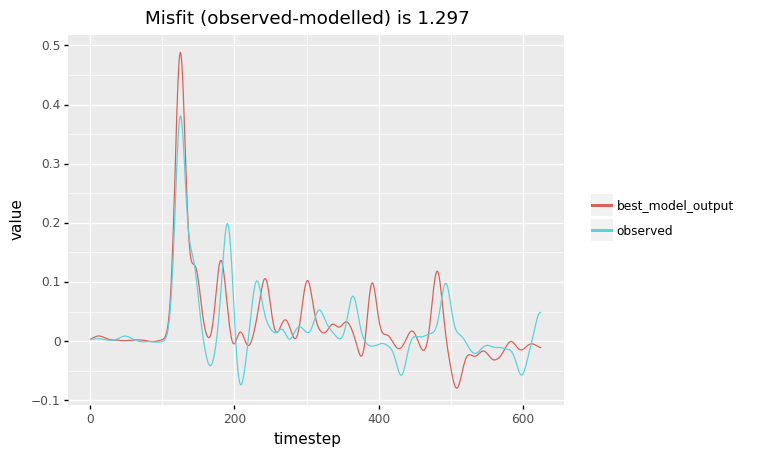

<ggplot: (8734317898743)>

In [10]:
df = pd.DataFrame(dict(timestep=range(len(pred)),best_model_output=pred, observed=obs))
p = ggplot(df.melt(id_vars="timestep"), aes(x="timestep",y="value",colour="variable")) + geom_line()
p = p + theme(legend_title=element_blank()) + ggtitle(f"Misfit (observed-modelled) is {misfit:0.3f}")
p